In [1]:


# maths library for matrix manipulation
import numpy as np

# matplotlib is a library for plotting things inside Python
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# This is a library for reading and writing image files

from skimage import io

In [3]:
# a library for finding files


import glob 

In [4]:
# JPGList = glob.glob('../../ImageData/Susanna/*.jpg')


# JPGList = glob.glob('/home/impett/Downloads/Annunc2/AnnuncsJun18/*/*.jpg')

JPGList = glob.glob('../../ImageData/Susanna/*.jpg')



In [5]:
len(JPGList)

48

In [6]:
allList = JPGList 

In [7]:
# allList is the list of all image file names

len(allList)

48

In [8]:
allList[13]   

'../../ImageData/Susanna/output-40.jpg'

In [9]:
io.imread(    allList[13]     ) 

array([[[ 54,  47,  39],
        [ 54,  47,  39],
        [ 54,  47,  39],
        ...,
        [134, 136, 135],
        [130, 132, 131],
        [115, 117, 116]],

       [[ 54,  47,  39],
        [ 54,  47,  39],
        [ 54,  47,  39],
        ...,
        [134, 136, 135],
        [134, 136, 135],
        [118, 120, 119]],

       [[ 53,  46,  38],
        [ 53,  46,  38],
        [ 53,  46,  38],
        ...,
        [136, 138, 137],
        [141, 143, 142],
        [126, 128, 127]],

       ...,

       [[ 60,  56,  45],
        [ 60,  56,  45],
        [ 61,  57,  46],
        ...,
        [131, 133, 132],
        [132, 134, 133],
        [139, 141, 140]],

       [[ 60,  56,  45],
        [ 60,  56,  45],
        [ 61,  57,  46],
        ...,
        [133, 135, 134],
        [133, 135, 134],
        [139, 141, 140]],

       [[ 60,  56,  45],
        [ 61,  57,  46],
        [ 61,  57,  46],
        ...,
        [140, 142, 141],
        [137, 139, 138],
        [137, 139, 138]]

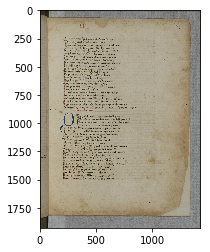

In [10]:
plt.imshow(     io.imread(    allList[13]     )     ) 

In [11]:
Im = io.imread( allList[13] )

In [12]:
from skimage import feature

In [13]:
from skimage import transform

In [14]:
Imr = transform.resize(Im,(256,256))

/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [15]:
F = feature.hog(Imr,  pixels_per_cell=(16,16)  )

/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [16]:
import tqdm

In [ ]:
allImages = []

for fileName in tqdm.tqdm(allList):
    im = io.imread(fileName)
    imr = transform.resize(im,(256,256))
    allImages.append(imr)
    

In [ ]:
imageFeatures = []
for image in tqdm.tqdm(allImages):
    F = feature.hog(image,  pixels_per_cell=(16,16)  )
    imageFeatures.append(F)
    

In [ ]:
from scipy.spatial import distance

In [ ]:
imf = np.asarray(imageFeatures)
mydistances = distance.squareform(distance.pdist(imf))

In [ ]:
plt.matshow(mydistances)

In [ ]:
plt.matshow(mydistances[4,:].reshape(1,-1))

In [ ]:
search_im = 38
plt.imshow(allImages[search_im])

In [ ]:
plt.figure(figsize=(15,15))
idx = np.argsort(mydistances[search_im,:])
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow( allImages[idx[i]])
    plt.axis('off')
    plt.title('Image ' + str(idx[i]))
    

In [ ]:
allImageSections = []

for fileName in tqdm.tqdm(allList):
    im = io.imread(fileName)
    
    for j in range(100):
        myshape = np.shape(im)
        w = myshape[0]
        h = myshape[1]
        size = np.random.randint(low=50,high=200)
        minw = np.random.randint(w - size)
        maxw = np.random.randint(h - size)

        newim = im[minw:minw+size,maxw:maxw+size,:]
        imr = transform.resize(newim,(256,256))
        allImageSections.append(imr)
    

In [ ]:
plt.imshow(allImageSections[59])

In [ ]:
len(allImageSections)

In [ ]:
from sklearn import decomposition

In [ ]:
imageFeatureSections = []
for image in tqdm.tqdm(allImageSections):
    F = feature.hog(image,  pixels_per_cell=(16,16)  )
    imageFeatureSections.append(F)
    

In [ ]:
imf = np.asarray(imageFeatureSections)

In [ ]:
mypca = decomposition.PCA(n_components=50)

In [ ]:
imf_pca = mypca.fit_transform(imf)

In [ ]:
np.shape(imf_pca)

In [ ]:
mydistances = distance.squareform(distance.pdist(imf_pca))

In [ ]:
search_im = np.random.randint(low=0,high=100)
plt.imshow(allImageSections[search_im])
print(search_im)

In [ ]:
plt.figure(figsize=(15,15))
idx = np.argsort(mydistances[search_im,:])
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow( allImageSections[idx[i]])
    plt.axis('off')
    plt.title('Distance: ' + str(mydistances[search_im,idx[i]]))

In [ ]:
plt.hist(mydistances[search_im,:],100);

In [ ]:
testIm = allImages[0]

In [ ]:
%matplotlib nbagg
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(testIm)
coords = []
def onclick(event):
    coords.append( [event.xdata, event.ydata])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [ ]:
xmin = int(coords[0][0])
ymin = int(coords[0][1])
xmax = int(coords[1][0])
ymax = int(coords[1][1])

In [ ]:
[xmin, xmax, ymin, ymax]

In [ ]:
%matplotlib inline
plt.imshow(testIm[ymin:ymax,xmin:xmax,:])

In [ ]:
queryIm = testIm[ymin:ymax,xmin:xmax,:]
queryIm = transform.resize(queryIm,(256,256))
queryF = feature.hog(queryIm,  pixels_per_cell=(16,16)  )

In [ ]:
# querydistances = distance.cdist(imf,queryF.reshape(1,-1))

qf_pca = mypca.transform(queryF.reshape(1,-1))
querydistances = distance.cdist(imf_pca,qf_pca)

In [ ]:
np.shape(imf)

In [ ]:
plt.hist(querydistances,100);

In [ ]:
plt.figure(figsize=(15,15))
idx = np.argsort(querydistances,axis=0)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow( allImageSections[idx[i][0]])
    plt.axis('off')
    plt.title('distance = ' + str(querydistances[idx[i][0]]))